In [ ]:
#Naive bayes theorem

# How to make text to audio

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
mydata = sns.load_dataset('iris')

In [4]:
mydata.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
mydata.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [7]:
mydata['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [8]:
x = mydata.iloc[:,0:4]
y = mydata.iloc[:,4]

In [9]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [11]:
# splitting the data into training and test

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=101)
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


# Niave Bayes Theorem

In [13]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [14]:
y_pred_train = nb_model.predict(x_train)
y_pred_test = nb_model.predict(x_test)

In [15]:
# Evaluate the model
from sklearn.metrics import accuracy_score

In [16]:
print(accuracy_score(y_train, y_pred_train))
print("\n")
print(accuracy_score(y_test, y_pred_test))

0.9553571428571429


0.9736842105263158


# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred_dt_train = dt_model.predict(x_train)
y_pred_dt_test = dt_model.predict(x_test)

In [19]:
print(accuracy_score(y_train, y_pred_dt_train))
print("\n")
print(accuracy_score(y_test, y_pred_dt_test))

1.0


0.9736842105263158


C:\Users\yasho\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


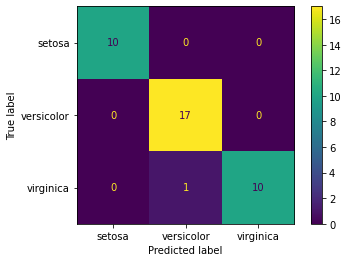

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt_model, x_test, y_test)
plt.show()

In [21]:
dt_model.feature_importances_

array([0.01791857, 0.        , 0.54862472, 0.43345671])

In [22]:
pd.DataFrame(index = x.columns, data=dt_model.feature_importances_, columns = ['Feature Importances'])

,Feature Importances
sepal_length,0.017919
sepal_width,0.000000
petal_length,0.548625
petal_width,0.433457


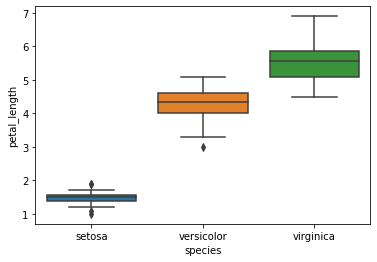

In [23]:
sns.boxplot(x='species', y ='petal_length', data=mydata)
plt.show()

In [24]:
mydata.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

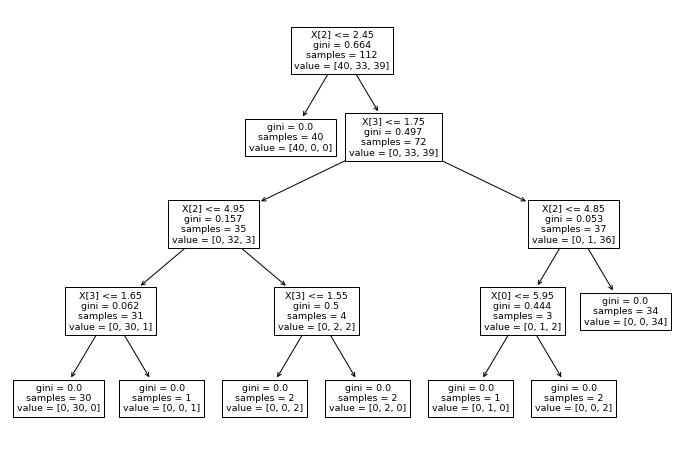

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dt_model)
plt.show()

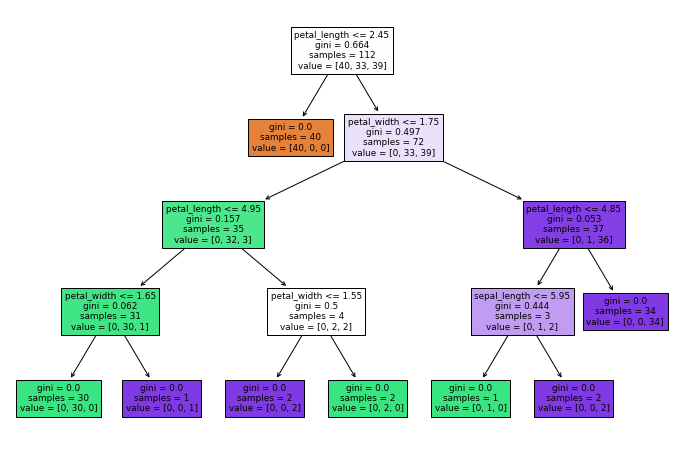

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dt_model, filled=True, feature_names = x.columns)
plt.show()

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
y_pred_rf_train = rf_model.predict(x_train)
y_pred_rf_test = rf_model.predict(x_test)

In [29]:
print(accuracy_score(y_train, y_pred_rf_train))
print("\n")
print(accuracy_score(y_test, y_pred_rf_test))

1.0


0.9736842105263158


# Make Text to Speech

In [30]:
!pip install gTTs

In [34]:
from gtts import gTTS

In [35]:
mysentence = input("Enter your sentence here for audio : \n >")

Enter your sentence here for audio : 
 >स्कूल में कक्षा पहली से लेख लिखने के लिए बोला जाता है. लेख किसी भी टॉपिक पर उसके बारे में विस्तार से लिखा जाता है. लेख के द्वारा विद्यार्थी दुनिया, जीवन, किसी व्यक्ति विशेष के बारे में करीब से जान पाता है. स्कूल, कॉलेज में लेख लिखने की प्रतियोगितायें भी होती है, जिनके द्वारा उनकी लेखन कला को आंका जाता है. हमने भी इसकी एक श्रंखला बनाई है, जिसमें बहुत सारे टॉपिक कवर करने की एक कोशिश की गई है.


In [36]:
audio = gTTS(text=mysentence, lang='hi', slow=False)

In [37]:
audio.save('hindi.mp3')